# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install scikit-plot scipy==1.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albucore 0.0.12 requires numpy<2,>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.11 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.11 requires scipy>=1.10.0, but y

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): Apache 2.0
 99% 65.0M/66.0M [00:04<00:00, 20.0MB/s]
100% 66.0M/66.0M [00:04<00:00, 15.1MB/s]


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
######################################################
###################### TO DO #########################
######################################################
df.describe()
######################################################
######################################################
######################################################

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


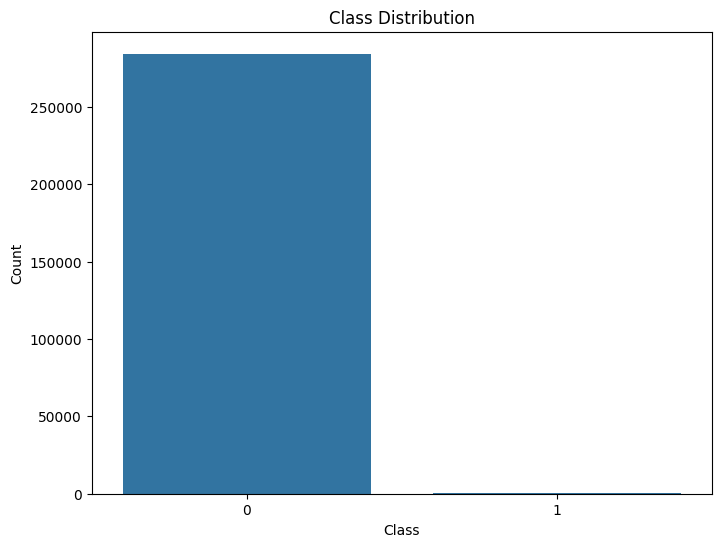

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
######################################################
###################### TO DO #########################
######################################################
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
######################################################
######################################################
######################################################

In [ ]:
# Display the class distribution in percentages
######################################################
###################### TO DO #########################
######################################################
print("Class Distribution:")
class_counts = df['Class'].value_counts(normalize=True) * 100
print(class_counts)
######################################################
######################################################
######################################################

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


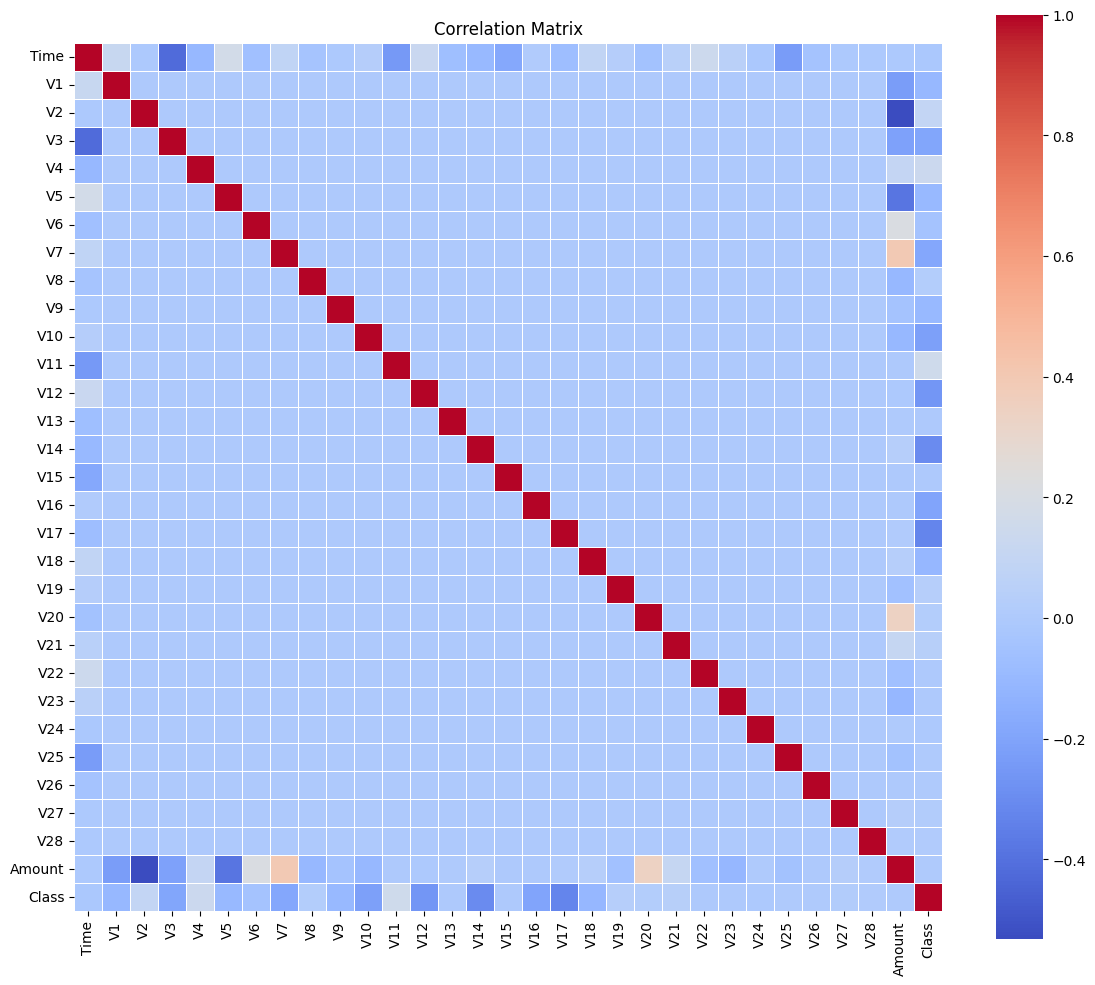

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
######################################################
###################### TO DO #########################
######################################################
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
######################################################
######################################################
######################################################

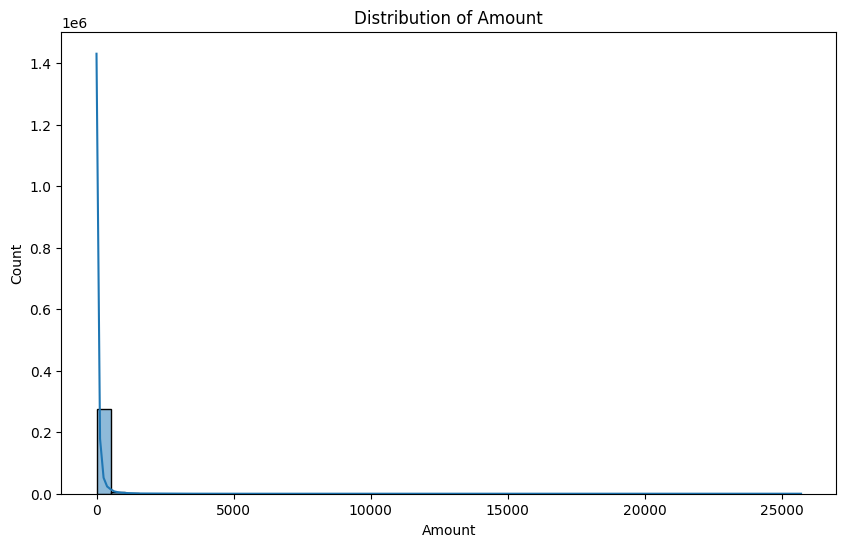

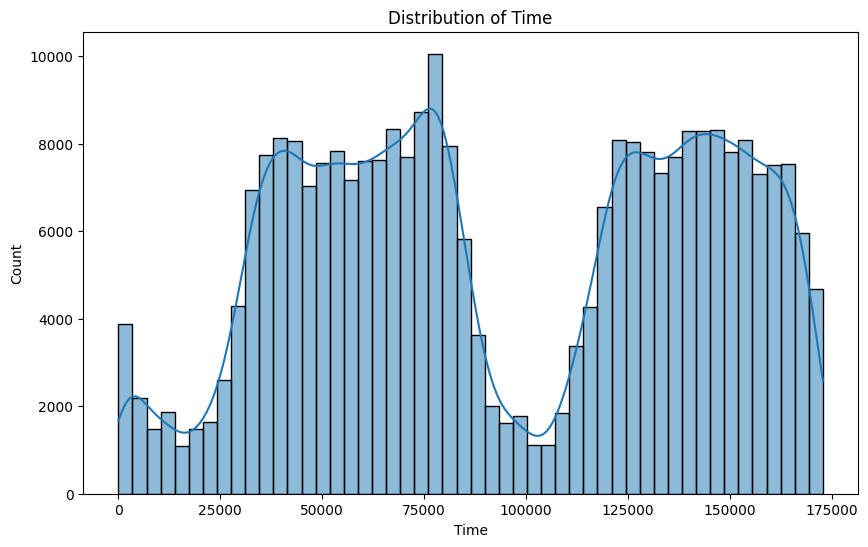

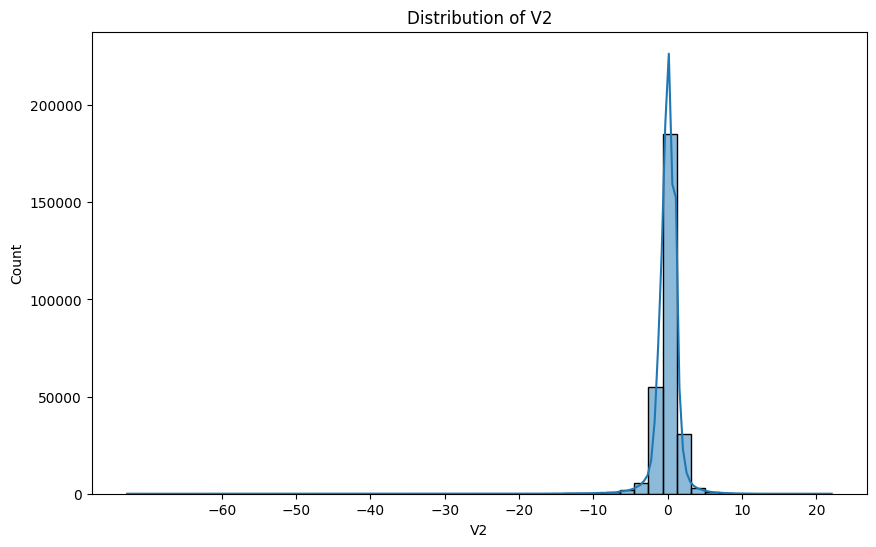

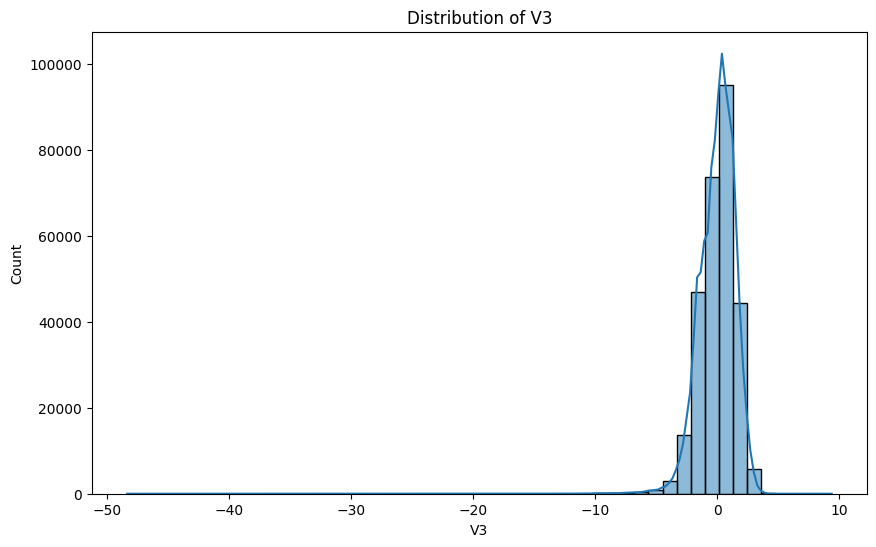

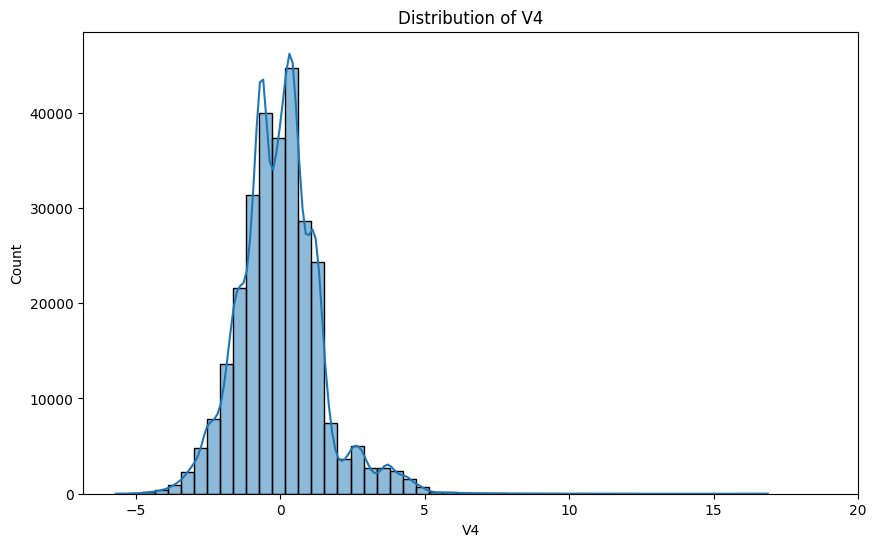

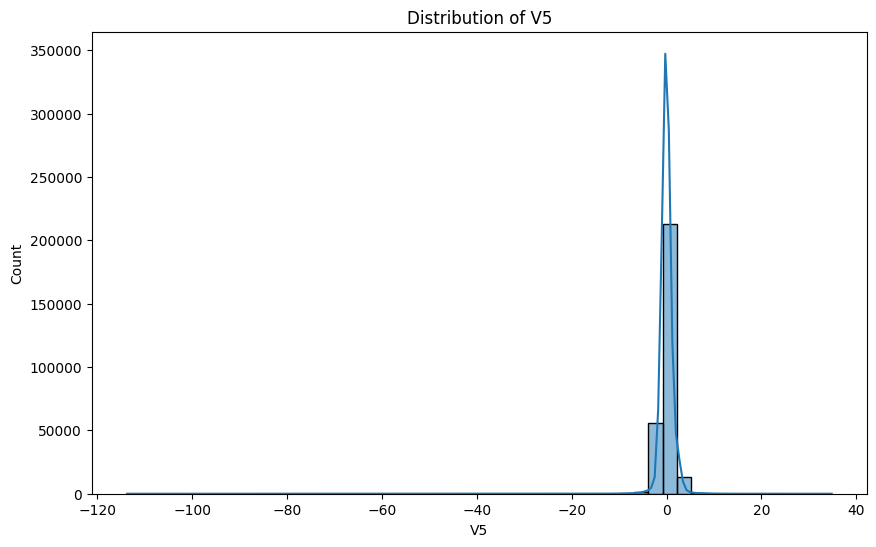

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
######################################################
###################### TO DO #########################
######################################################
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    # Set the x-ticks based on the feature
    if feature == 'Amount':
        plt.xticks(np.arange(0, 30000, 5000))
    elif feature == 'Time':
        plt.xticks(np.arange(0, 200000, 25000))
    elif feature == 'V2':
        plt.xticks(np.arange(-60, 30, 10))
    elif feature == 'V3':
        plt.xticks(np.arange(-50, 20, 10))
    elif feature == 'V4':
        plt.xticks(np.arange(-5, 25, 5))
    elif feature == 'V5':
        plt.xticks(np.arange(-120, 60, 20))
    plt.show()
######################################################
######################################################
######################################################


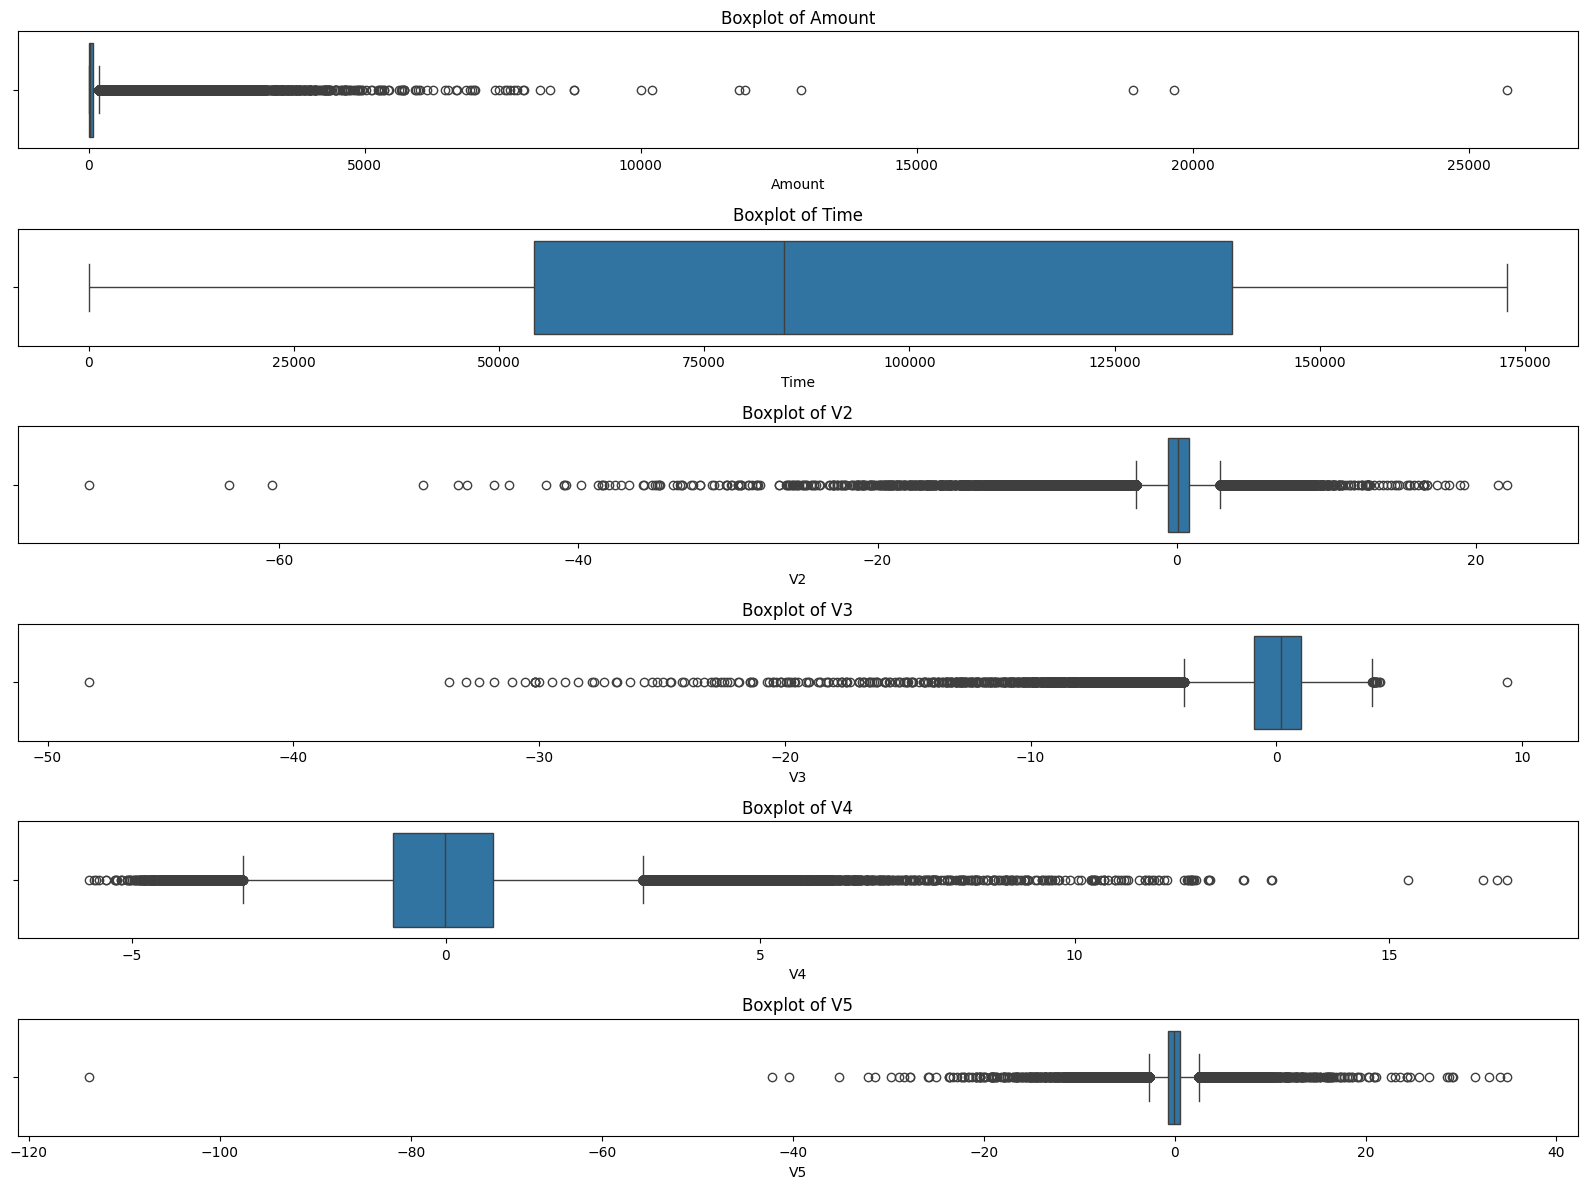

In [ ]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
from sklearn.decomposition import PCA

# 1. Outlier Detection
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()
##########################################################
##########################################################
##########################################################

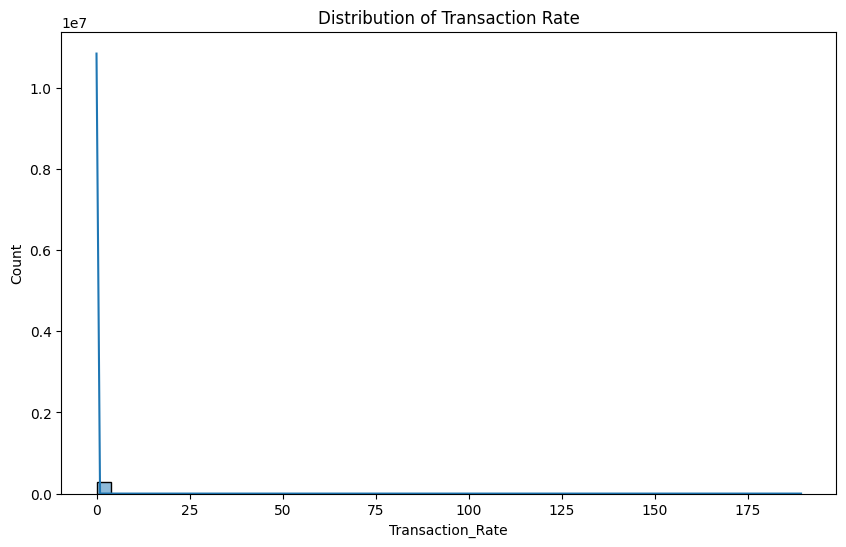

In [ ]:
# 2. Feature Engineering: Create a new feature 'Transaction_Rate' as Amount divided by Time
df['Transaction_Rate'] = df['Amount'] / (df['Time'] + 1)  # Adding 1 to avoid division by zero
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Rate'], kde=True, bins=50)
plt.title('Distribution of Transaction Rate')
plt.show()

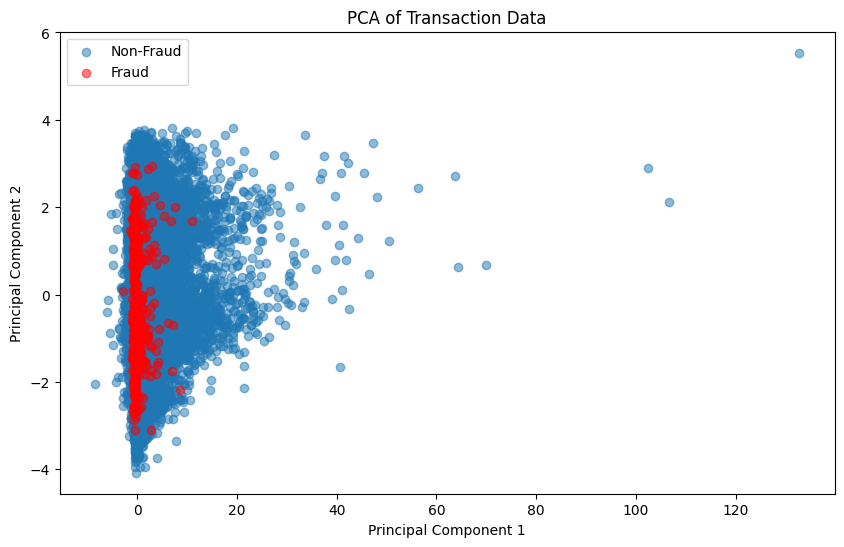

In [ ]:
# 3. Dimensionality Reduction: PCA
X = df.drop(['Class', 'Transaction_Rate'], axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.5, label='Non-Fraud')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.5, label='Fraud', color='red')
plt.title('PCA of Transaction Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

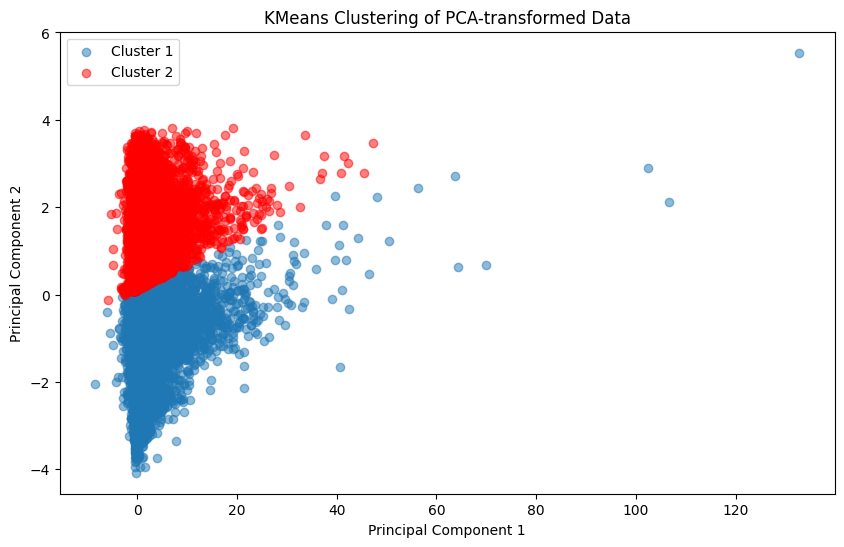

In [ ]:
# 4. Clustering: KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[labels == 0, 0], X_pca[labels == 0, 1], alpha=0.5, label='Cluster 1')
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1], alpha=0.5, label='Cluster 2', color='red')
plt.title('KMeans Clustering of PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

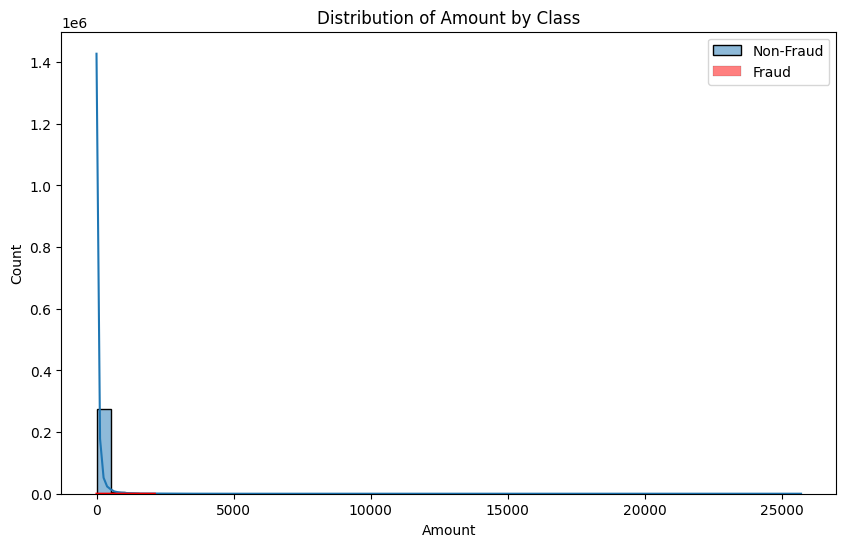

In [ ]:
# 5. Insightful Plots: Fraud vs Non-Fraud Distribution for a Feature
feature = 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0][feature], kde=True, bins=50, label='Non-Fraud')
sns.histplot(df[df['Class'] == 1][feature], kde=True, bins=50, label='Fraud', color='red')
plt.title(f'Distribution of {feature} by Class')
plt.legend()
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  
  1.
  
      *   Imbalanced Classes: One of the most significant challenges observed is the highly imbalanced nature of the dataset. The number of fraud transactions (class 1) is extremely low compared to non-fraud transactions (class 0). This imbalance can cause models to be biased towards the majority class, leading to poor performance in detecting fraud.
      *   Outliers: The presence of outliers is another challenge. As seen in the box plots of the selected features, several features have extreme values that could potentially affect the performance of the machine learning models. Outliers can skew the data distribution and impact the training process, leading to less robust models.
  2.
  
      *   Low Correlation with the Target Variable: Most features have very low correlation with the target variable (Class), which suggests that individual features do not have a strong linear relationship with whether a transaction is fraud or not. This indicates that a more complex model might be necessary to capture the relationships between the features and the target variable.
      *   Some Features with High Inter-correlation: Some features exhibit high correlation with each other. This could indicate redundancy in the data, where some features might not add new information and could potentially be removed or combined during feature engineering.
  3. The PCA plot and clustering results provide evidence that the data is not linearly separable. In the PCA plot, fraud and non-fraud transactions are not distinctly separated along the principal components, indicating overlap between the classes. This overlap suggests that a linear model may not be sufficient to classify the transactions effectively.
  Additionally, the KMeans clustering plot shows that the clusters formed by the algorithm do not correspond well to the fraud and non-fraud classes, further supporting the idea that the data is not linearly separable. This means that more complex models, such as non-linear classifiers or ensemble methods, might be needed to achieve better performance.











## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [ ]:
######################################################
###################### TO DO #########################
######################################################
# Ensuring the target variable 'Class' is of integer type and binary
df['Class'] = df['Class'].astype(int)
assert df['Class'].isin([0, 1]).all(), "Class column contains values other than 0 and 1"

# Handling missing values (if any)
df.fillna(0, inplace=True)

# Outlier detection and treatment (example: clipping)
for feature in df.columns:
    if feature != 'Class':
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[feature] = np.clip(df[feature], lower_bound, upper_bound)
######################################################
######################################################
######################################################

In [ ]:
######################################################
###################### TO DO #########################
######################################################
# Data Transformation: Standardization
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Feature Engineering: Create a new feature 'Transaction_Rate'
df['Transaction_Rate'] = df['Amount'] / (df['Time'] + 1)
######################################################
######################################################
######################################################

In [ ]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################
# Handling Imbalanced Data: SMOTE
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
##########################################################
##########################################################
##########################################################

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x781927a5f250>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

Logistic Regression (Unpreprocessed) Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.81      0.83       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Cross-Validation Accuracy (Unpreprocessed): 0.9993730062853251


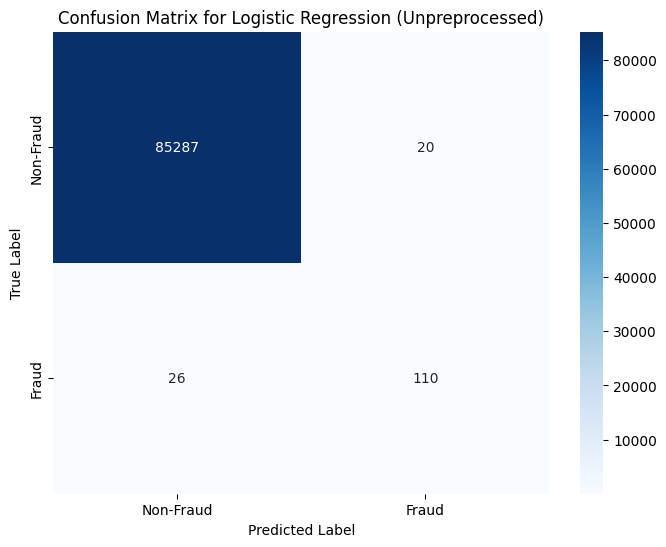

In [ ]:
######################################################
###################### TO DO #########################
######################################################
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

lr = LogisticRegression()
lr.fit(X_train, y_train)  # Unpreprocessed
y_pred_lr = lr.predict(X_test)
print("Logistic Regression (Unpreprocessed) Metrics:")
print(classification_report(y_test, y_pred_lr))
unpreprocessed_scores = cross_val_score(lr, X_train, y_train, cv=KFold(n_splits=5), scoring='accuracy')
print("Cross-Validation Accuracy (Unpreprocessed):", unpreprocessed_scores.mean())

# Plot confusion matrix for Logistic Regression (Unpreprocessed)
conf_matrix_lr_unpreprocessed = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_unpreprocessed, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression (Unpreprocessed)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
######################################################
######################################################
######################################################

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Cross-Validation Accuracy (preprocessed): 0.9493034976862085


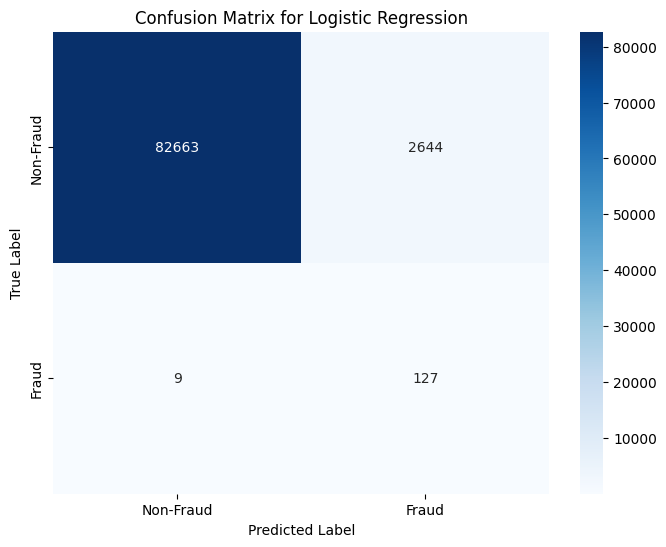

In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))
preprocessed_scores = cross_val_score(lr, X_resampled, y_resampled, cv=KFold(n_splits=5), scoring='accuracy')
print("Cross-Validation Accuracy (preprocessed):", preprocessed_scores.mean())

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



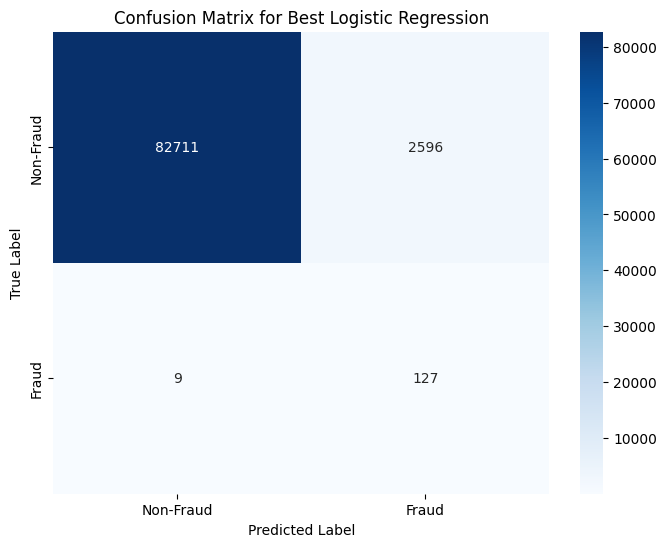

In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_resampled, y_resampled)
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print("Best Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_best_lr))
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Best Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
###################################################################################
###################################################################################
###################################################################################

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

SVM (Unpreprocessed) Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Cross-Validation Accuracy (Unpreprocessed): 0.998214321441685


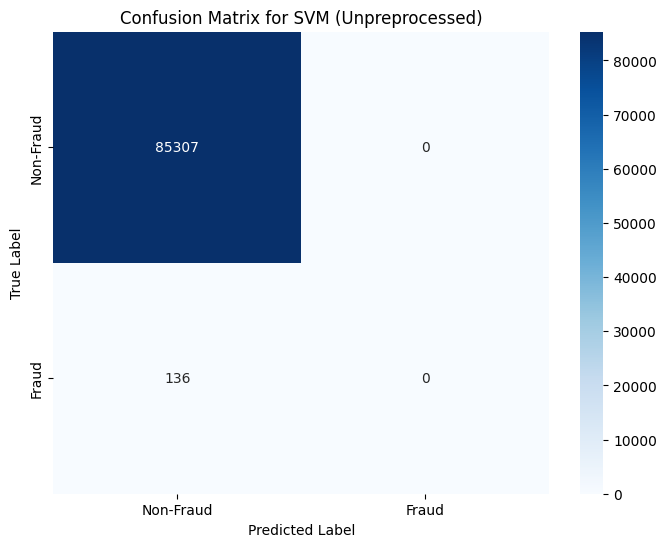

In [ ]:
######################################################
###################### TO DO #########################
######################################################
svm = SVC(probability=True)
svm.fit(X_train, y_train)  # Unpreprocessed
y_pred_svm = svm.predict(X_test)
print("SVM (Unpreprocessed) Metrics:")
print(classification_report(y_test, y_pred_svm))
unpreprocessed_scores_svm = cross_val_score(svm, X_train, y_train, cv=KFold(n_splits=5), scoring='accuracy')
print("Cross-Validation Accuracy (Unpreprocessed):", unpreprocessed_scores_svm.mean())

# Plot confusion matrix for SVM (Unpreprocessed)
conf_matrix_svm_unpreprocessed = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_unpreprocessed, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM (Unpreprocessed)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
######################################################
######################################################
######################################################

In [ ]:
pca = PCA(n_components=20)
X_resampled_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test)

svm_pca = SVC(probability=True, class_weight='balanced', random_state=42)
svm_pca.fit(X_resampled_pca, y_resampled)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
print("SVM with PCA Metrics:")
print(classification_report(y_test, y_pred_svm_pca))
preprocessed_scores_svm = cross_val_score(svm_pca, X_resampled_pca, y_pred_svm_pca, cv=KFold(n_splits=5), scoring='accuracy')
print("Cross-Validation Accuracy (preprocessed):", preprocessed_scores_svm.mean())

conf_matrix_svm_pca = confusion_matrix(y_test, y_pred_svm_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
# Hyperparameter Tuning for SVM with PCA
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svm_pca = GridSearchCV(estimator=svm_pca, param_grid=param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm_pca.fit(X_resampled_pca, y_resampled)
best_svm_pca = grid_search_svm_pca.best_estimator_
y_pred_best_svm_pca = best_svm_pca.predict(X_test_pca)
print("Best SVM with PCA Metrics:")
print(classification_report(y_test, y_pred_best_svm_pca))
conf_matrix_best_svm_pca = confusion_matrix(y_test, y_pred_best_svm_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_svm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Best SVM with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
###################################################################################
###################################################################################
###################################################################################


In [ ]:
# ROC Curve Plotting Function
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for tuned models
plot_roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1], "Logistic Regression (Tuned)")
plot_roc_curve(y_test, best_svm_pca.predict_proba(X_test_pca)[:, 1], "SVM with PCA (Tuned)")

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**

    1. **SVM**:
    - Strengths:
        - Effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.
        - Uses kernel trick to handle non-linear relationships.
        - Generally robust to outliers.
    - Weaknesses:
        - Computationally expensive, especially for large datasets.
        - Can be less interpretable than logistic regression.

    2. **Logistic Regression**:
    - Strengths:
        - Simple and easy to interpret.
        - Fast to train and can handle large datasets.
        - Probabilistic output which can be useful for threshold tuning.
    - Weaknesses:
        - Assumes linearity between the independent variables and the log odds.
        - Might not perform well if there are complex relationships in the data.

### Evaluation Metric: Accuracy

Accuracy can be misleading, especially in cases of imbalanced datasets where one class is much more frequent than the other. If a dataset has a 99% majority class and 1% minority class, predicting the majority class all the time will give 99% accuracy but will fail to capture the minority class.

### Recommendations for High Recall

To achieve high recall, especially in imbalanced datasets, the following strategies can be employed:
1. **Class Weight Adjustment**: Penalizing the model more for misclassifying the minority class.
2. **Resampling Techniques**: Using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class to balance the dataset.
3. **Threshold Tuning**: Adjusting the decision threshold to increase recall.
4. **Ensemble Methods**: Using ensemble methods like Random Forest or Gradient Boosting which often perform better in capturing minority classes.

### Specific Analysis Based on Provided Metrics

1. **SVM (Unpreprocessed)**:
    - **Metrics**:
        - Precision, Recall, F1-Score for class 1 (minority class) are all 0.00, indicating the model fails to identify any instances of the minority class.
        - High accuracy (1.00) is due to the high proportion of the majority class.
    - **Cross-Validation Accuracy**: 0.9982

2. **Logistic Regression**:
    - **Metrics**:
        - Precision for class 1 (minority class) is very low (0.05), but recall is high (0.93), meaning the model captures most of the minority class instances.
        - The accuracy is slightly lower (0.97), which is expected due to the focus on capturing minority class instances.
    - **Cross-Validation Accuracy**: 0.9493

### Recommendations Based on Results

1. **Model Choice**:
    - **Logistic Regression**: Despite the lower overall accuracy, it achieves a significantly higher recall for the minority class, making it a better choice if high recall is crucial.

2. **Improving Recall**:
    - **Class Weight Adjustment**: For both models, we can ensure the class weights are adjusted to penalize the minority class more.
    - **Resampling**: By applying techniques like SMOTE to balance the dataset before training.
    - **Threshold Tuning**: For logistic regression, doing experiment with different thresholds to find a balance between precision and recall.
    - **Ensemble Methods**: Considering using ensemble methods like Random Forest or Gradient Boosting to improve minority class detection.
  

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

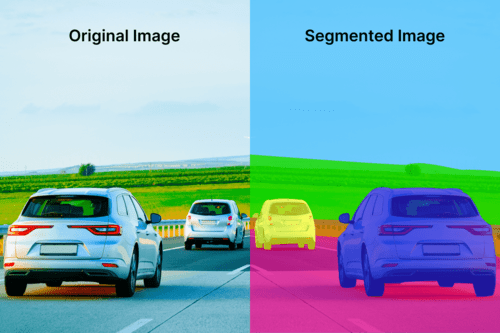

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 81.1MB/s]


In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


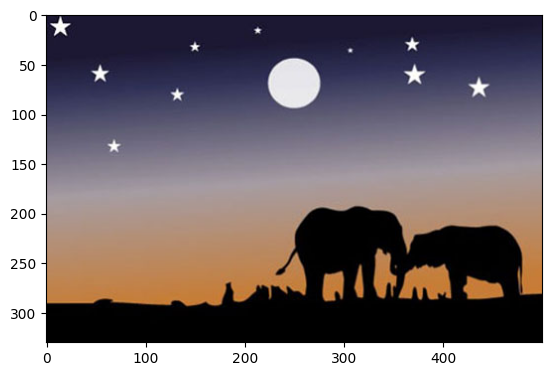

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








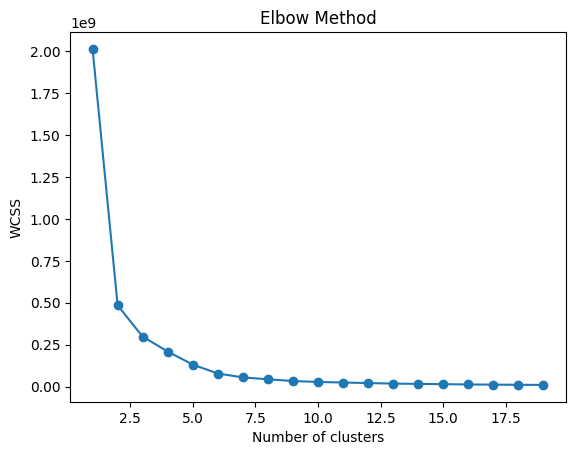

In [ ]:
# Elbow Method or # Silhouette Score
######################################################
###################### TO DO #########################
######################################################
# The optimal number of clusters when clustering all pixels represents the predominant colors in an image.
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
######################################################
######################################################
######################################################


## Visualize Dominant Color

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
# KneeLocator to find the optimal number of clusters
kneedle = KneeLocator(range(1, 20), wcss, S=1.0, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 3


In [ ]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
# hard-code
optimal_clusters = 6
dominant_colors = kmeans.cluster_centers_
kmeans = KMeans(n_clusters=optimal_clusters)
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

KMeans(n_clusters=6)

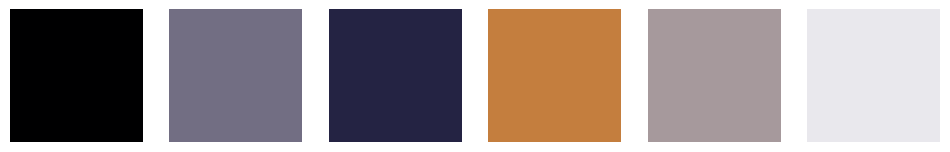

In [ ]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
fig, ax = plt.subplots(1, optimal_clusters, figsize=(optimal_clusters * 2, 2))
for i in range(optimal_clusters):
    color = dominant_colors[i].astype(int)
    color_image = np.zeros((50, 50, 3), dtype='uint8')
    color_image[:, :] = color
    ax[i].imshow(color_image)
    ax[i].axis('off')
plt.show()
######################################################
######################################################
######################################################

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


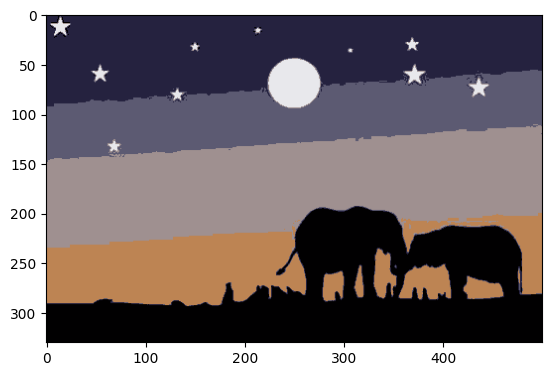

In [ ]:
colors = kmeans.cluster_centers_
labels = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[labels[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()